## Creating CNN Using Transfer Learning and from Scratch

Dataset is downloaded from: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/

In [ ]:
# import the libraries as shown below
import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import itertools
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train/Parasitized',
 '/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train/Uninfected']

In [ ]:
# flatten the output of vg19 before adding the last softmax/output layer
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# specify the cost and optimization  
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 16000 images belonging to 2 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size for test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5559 images belonging to 2 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size for validation set
validation_set = train_datagen.flow_from_directory('/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/validation',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 6000 images belonging to 2 classes.


### Display sample images of type 'Infected'

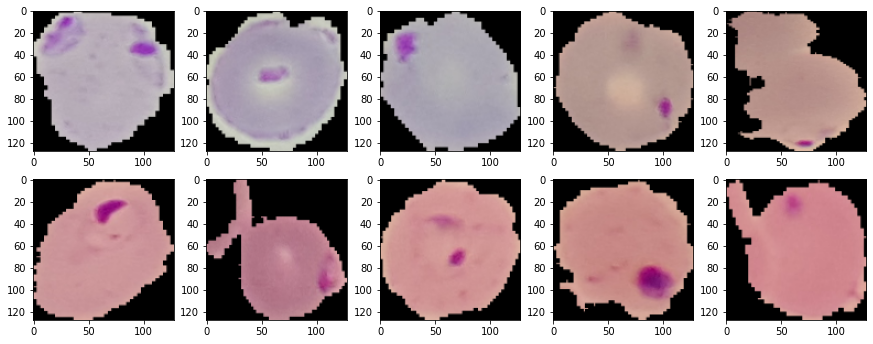

In [ ]:
import random
import os
import imageio
image_dir = '/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train/Parasitized/'

filenames=random.sample(os.listdir(image_dir),11)

#Display 25 images from Parasitized cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

### Display sample images of type 'Uninfected'

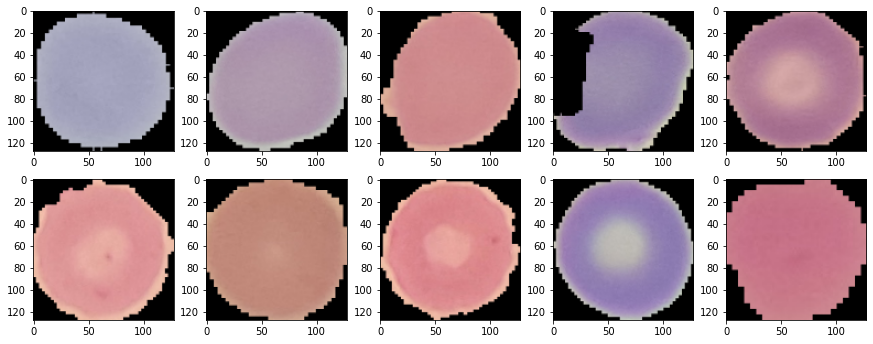

In [ ]:
image_dir = '/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/train/Uninfected/'

filenames=random.sample(os.listdir(image_dir),11)

#Display 25 images from Uninfected cells
plt.figure(figsize=(15,15))
for i in range(1,len(filenames)):
    row = i
    image = imageio.imread(image_dir+filenames[i]) #Image(filename=image_dir+filenames[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

In [ ]:
checkpoint_path = "/content/drive/MyDrive/malaria_prediction/malaria_prediction/data/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
'''
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
'''

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set),
  callbacks=cp_callback)  # Pass callback to training)


Epoch 1/50
500/500 [==============================] - 6564s 13s/step - loss: 0.4890 - accuracy: 0.7717 - val_loss: 0.3351 - val_accuracy: 0.8670

Epoch 00001: saving model to /content/drive/MyDrive/malaria_prediction/malaria_prediction/data/training_1/cp.ckpt
Epoch 2/50
500/500 [==============================] - 271s 542ms/step - loss: 0.3164 - accuracy: 0.8676 - val_loss: 0.2794 - val_accuracy: 0.8942

Epoch 00002: saving model to /content/drive/MyDrive/malaria_prediction/malaria_prediction/data/training_1/cp.ckpt
Epoch 3/50
500/500 [==============================] - 270s 540ms/step - loss: 0.3007 - accuracy: 0.8795 - val_loss: 0.2637 - val_accuracy: 0.9005

Epoch 00003: saving model to /content/drive/MyDrive/malaria_prediction/malaria_prediction/data/training_1/cp.ckpt
Epoch 4/50
500/500 [==============================] - 270s 539ms/step - loss: 0.2475 - accuracy: 0.9035 - val_loss: 0.3248 - val_accuracy: 0.8773

Epoch 00004: saving model to /content/drive/MyDrive/malaria_prediction/

In [ ]:
!ls {checkpoint_dir}

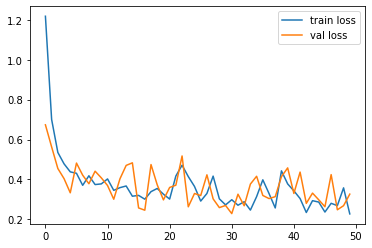

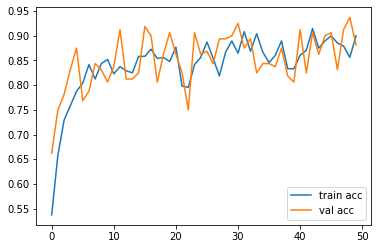

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')
print('model saved')

model saved


In [ ]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:

y_prediction = model.predict(test_set)


In [ ]:
import numpy as np
y_prediction = np.argmax(y_prediction, axis=1)

In [ ]:
y_prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/malaria_prediction/Malaria-Detection-master/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163029_cell_52.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)


In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[2.2599132e-05, 9.9997735e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([1])

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=test_set.classes, y_pred=y_prediction)

In [ ]:
cm_plot_labels = ['Infected','Uninfected']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')